# **CS 351L - AI Lab**

## **Instructor: Mr. Usama Arshad, PhD CS**
### **BS Cybersecurity - 5th Semester**

---

### **Welcome to the AI Lab Course!**

In this lab, we will explore various concepts in Artificial Intelligence (AI), focusing on practical implementations using Python. You will work on hands-on exercises and projects that will help you understand AI techniques, algorithms, and tools commonly used in the field of AI and cybersecurity.

### **Course Overview:**
- **Course Code:** CS 351L
- **Program:** BS Cybersecurity
- **Semester:** 5th

---



### **CS 351L - AI Lab - Lab 9**


---

### **Learning Objectives:**

By the end of this lab, students will be able to:

1. Understand the concepts of basic Neural Network.
2. Implement basic Neural Network with regularization in Python.
3. Explore and apply on different datasets and visualize.



---

### **Let's get started!**

![Alt Text](https://cdn.dribbble.com/users/1523313/screenshots/16134521/media/3975730626bdae63cf9b25d3b634bac3.gif)



# **Lab 9: Optimization Techniques in Neural Networks**
---

### **Introduction**
Optimization techniques are essential in neural networks to improve generalization, reduce overfitting, and enhance model performance. Regularization methods such as **Dropout**, **L1**, and **L2** are widely used to achieve this.

- **Dropout**: Randomly disables neurons during training to prevent over-reliance on specific features.
- **L1 Regularization**: Encourages sparsity by penalizing the absolute values of weights.
- **L2 Regularization**: Discourages large weights by penalizing their squared values.

In this lab, you will implement these regularization techniques and compare their effects.

---
    


## **Step 1: Import Required Libraries**
We will use TensorFlow/Keras for building and training neural networks.
    

In [1]:

# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, classification_report  # For evaluation
import tensorflow as tf  # For building and training models
from tensorflow.keras.models import Sequential  # Sequential model API
from tensorflow.keras.layers import Dense, Dropout  # Layers for the neural network
from tensorflow.keras.regularizers import l1, l2  # Regularization
import matplotlib.pyplot as plt  # For visualizations

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)



## **Step 2: Load the Dataset and Visualize Raw Data**
We will use the Iris dataset as an example and visualize its raw features.
    

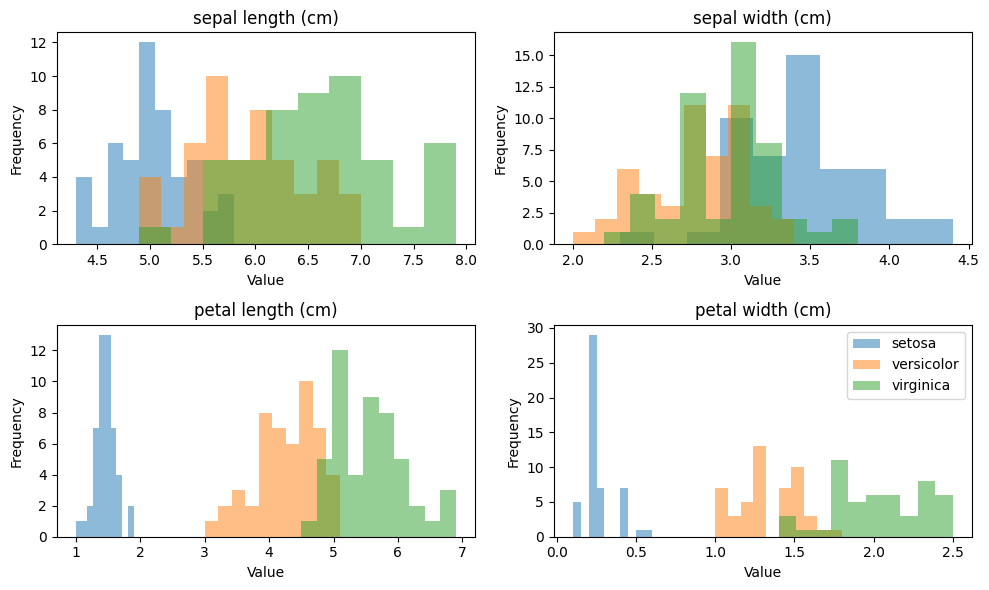

In [2]:

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Class names

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Visualize raw features
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    for target in np.unique(y):
        plt.hist(df[df['target'] == target][feature], alpha=0.5, label=target_names[target])
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()



## **Step 3: Preprocess the Data and Visualize**
We will standardize the features and one-hot encode the target labels.
    

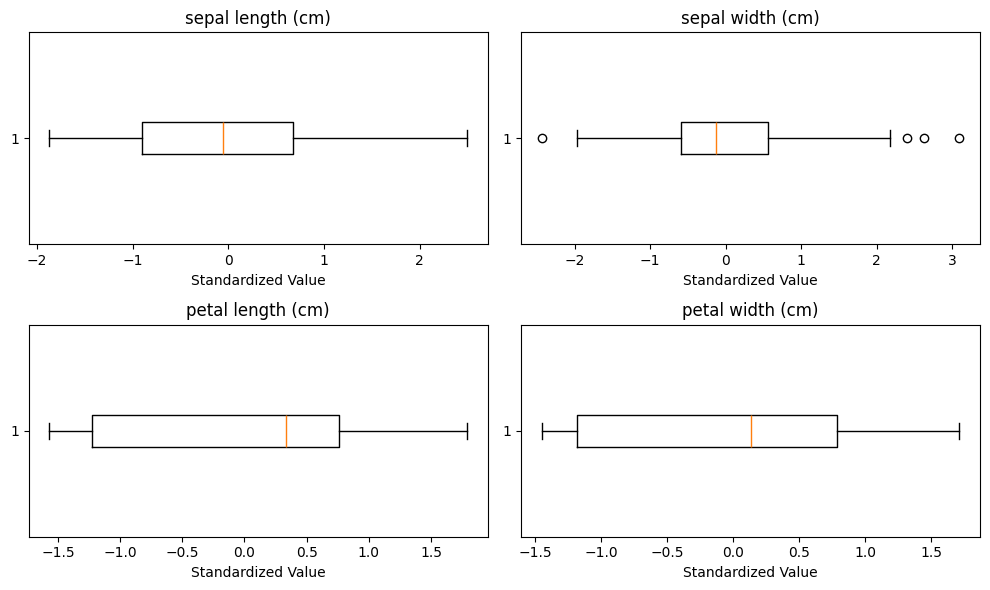

In [3]:

# One-hot encode the target labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize standardized features
plt.figure(figsize=(10, 6))
for i in range(X_scaled.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(X_scaled[:, i], vert=False)
    plt.title(iris.feature_names[i])
    plt.xlabel('Standardized Value')
plt.tight_layout()
plt.show()



## **Step 4: Split Data into Training and Testing Sets**
Split the data into training and testing sets and prepare for modeling.
    

In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Visualize the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 105 samples
Testing set size: 45 samples


In [5]:

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Class names

# One-hot encode the target labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)



## **Step 3: Build and Train Models**
We will build multiple models:
1. **Baseline Model**: No regularization.
2. **Dropout Regularization**.
3. **L1 Regularization**.
4. **L2 Regularization**.
    

In [6]:

# Function to build a baseline model
def build_baseline_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,)),  # Hidden layer
        Dense(output_dim, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# Function to build a model with Dropout
def build_dropout_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),  # Dropout layer with 50% dropout rate
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build a model with L1 regularization
def build_l1_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,), kernel_regularizer=l1(0.01)),  # L1 regularization
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build a model with L2 regularization
def build_l2_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.01)),  # L2 regularization
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



## **Step 4: Train and Compare Models**
We will train each model for 50 epochs and visualize their performance.
    

In [7]:

# Initialize models
baseline_model = build_baseline_model(X_train.shape[1], y_train.shape[1])
dropout_model = build_dropout_model(X_train.shape[1], y_train.shape[1])
l1_model = build_l1_model(X_train.shape[1], y_train.shape[1])
l2_model = build_l2_model(X_train.shape[1], y_train.shape[1])

# Train models
history_baseline = baseline_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
history_dropout = dropout_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
history_l1 = l1_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
history_l2 = l2_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



## **Step 5: Visualize Training Results**
We will compare loss and accuracy for all models.
    

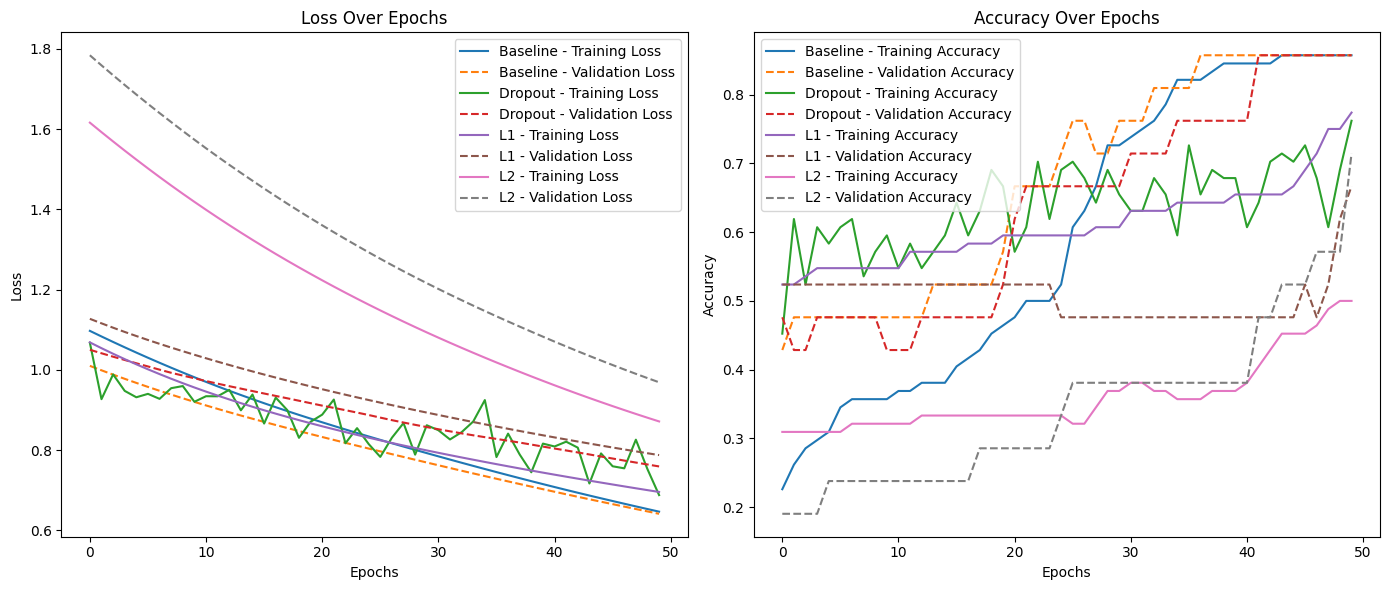

In [8]:

# Function to plot training and validation results
def plot_history(histories, labels):
    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} - Training Loss')
        plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{label} - Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Training Accuracy')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{label} - Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Compare all models
plot_history(
    [history_baseline, history_dropout, history_l1, history_l2],
    ['Baseline', 'Dropout', 'L1', 'L2']
)



## **Step 6: Evaluate Models on Test Data**
Evaluate each model and visualize the confusion matrix.
    

Evaluating Baseline Model
Test Loss: 0.6661, Test Accuracy: 0.8444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


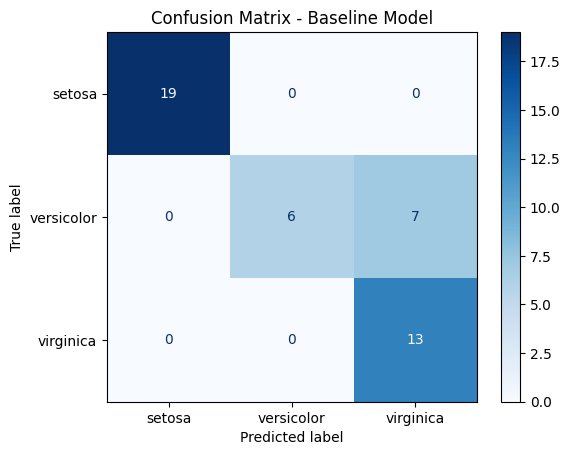

Evaluating Dropout Model
Test Loss: 0.6774, Test Accuracy: 0.7333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


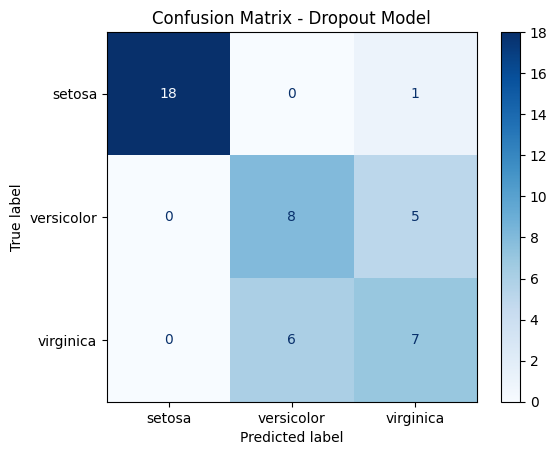

Evaluating L1 Model
Test Loss: 0.6136, Test Accuracy: 0.6444


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


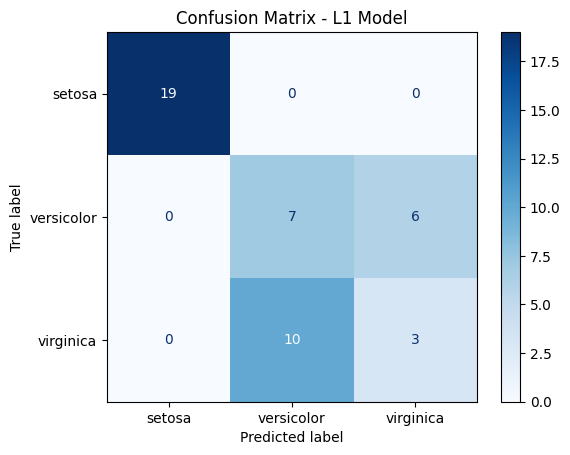

Evaluating L2 Model
Test Loss: 0.7916, Test Accuracy: 0.6444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


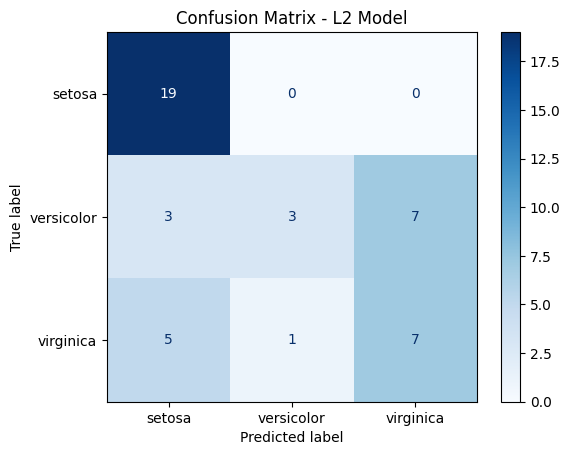

In [9]:

# Evaluate models on test data
models = [baseline_model, dropout_model, l1_model, l2_model]
labels = ['Baseline', 'Dropout', 'L1', 'L2']

for model, label in zip(models, labels):
    print(f"Evaluating {label} Model")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
    plt.title(f"Confusion Matrix - {label} Model")
    plt.show()
